In [1]:
import cartopy.crs as ccrs
from cmocean import cm 
from dino import Experiment
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import cftime as cft
import xnemogcm as xn
import xgcm

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
path   = "/data/dkamm/nemo_output/NEVERWORLD/"

#dino_exp = Experiment(path, 'GAUS_RIDGE/GAUS_RIDGE')
#dino_exp = Experiment(path, '1_deg_GM/restart0')
#dino_exp = Experiment(path, 'Triad_400y/restart2')
dino_exp = Experiment(path, '../DINO/T_star_IPSL')

In [4]:
bathymetry = dino_exp.domain.gdept_0.isel(z_c=-1)
bathymetry = bathymetry.assign_coords({'x_globe': bathymetry.glamt - 30})

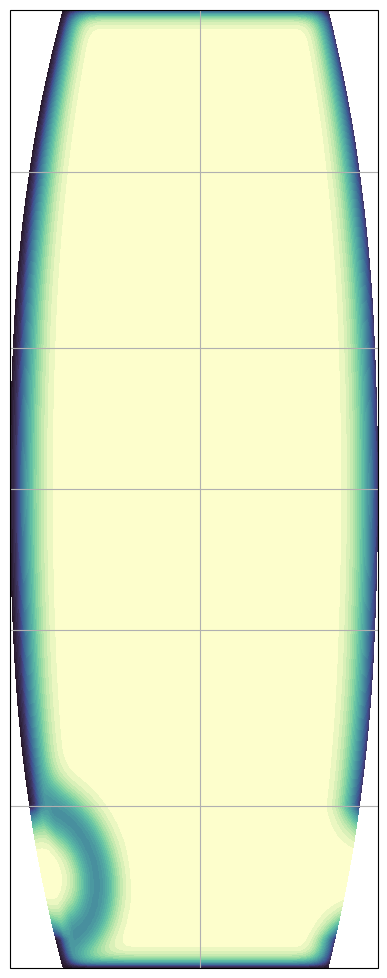

In [5]:
plt.figure(figsize=(10,10))
p = bathymetry.plot.contourf(
    y='gphit',
    x='x_globe',
    cmap=cm.deep_r,
    levels=30,
    subplot_kws=dict(projection=ccrs.Robinson()),

    transform=ccrs.PlateCarree(),

    add_colorbar=False,
    # cmap='inferno'
)
# p = channel.plot.contourf(
#     y='gphit',
#     x='x_globe',
#     cmap=cm.deep_r,
#     levels=70,
#     #alpha=0.8,
#     subplot_kws=dict(projection=ccrs.Orthographic(-30., 0.), facecolor="black"),

#     transform=ccrs.PlateCarree(),

#     add_colorbar=False,
#     # cmap='inferno'
# )
#plt.hlines(20, 0, 60, color='white')
#p.axes.coastlines(color='white', linewidth=3)
p.axes.gridlines(
    draw_labels=["x", "y", "geo"],
    ylocs=[-70, -45, -20, 0, 20, 45, 70],
    xlocs=[0]
)
plt.title('')
plt.grid('m')
plt.tight_layout()
#plt.savefig('DINO_bathy_3.png', facecolor=(1,1,1,0))

# Forcing

In [14]:
# Wolfe Cessi (2014) analytical forcing

lat = np.linspace(-5000, 5000, 200)

tau = 0.1 * ( - np.cos(
    3 * np.pi * lat / 2 / (5000) )
    + 0.8 * np.exp( - lat**2 / 640**2)
)

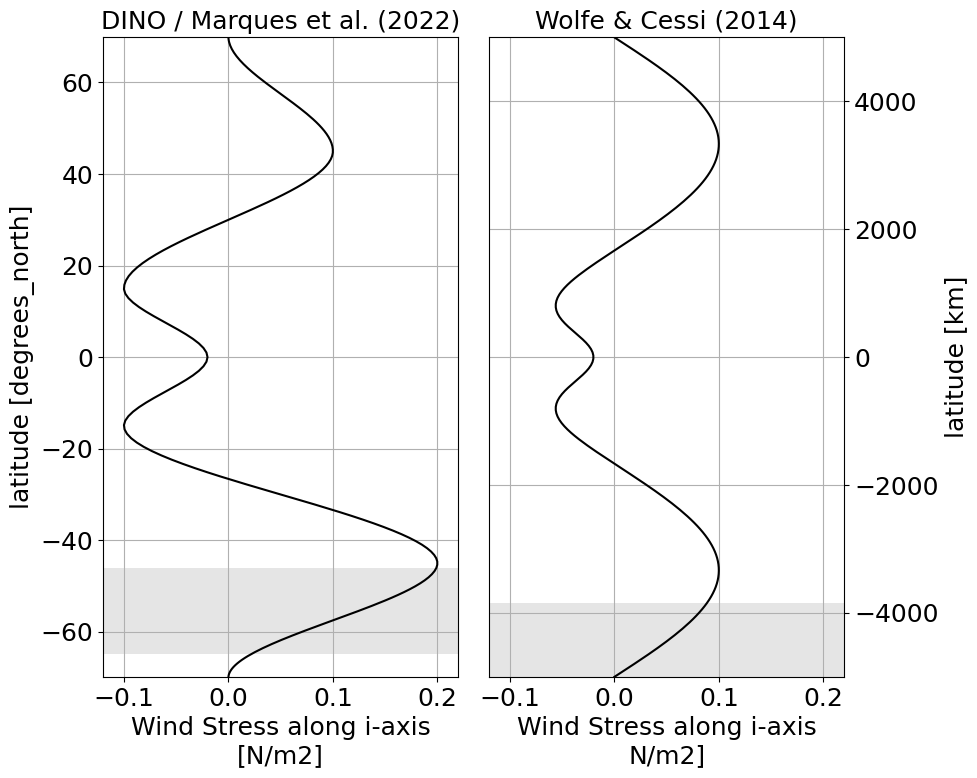

In [47]:
fig, axs = plt.subplots(1,2,figsize=(10,8), sharex=True)
dino_exp.data.utau.isel(t_y=-1, x_f=10).plot(color='black', y='gphiu', ax=axs[0])
axs[0].fill_betweenx(dino_exp.domain.gphiu.values[:,0], -0.12, 0.22, where=dino_exp.domain.umask.isel(x_f=0, z_c=0)==1, facecolor='grey', alpha=.2)
axs[0].margins(x=0, y=0)
axs[0].set_title('DINO / Marques et al. (2022)')
axs[0].grid()

axs[1].plot(tau, lat, color='black')
axs[1].fill_betweenx(lat, -0.12, 0.22, where=lat<-3800, facecolor='grey', alpha=.2)
axs[1].margins(x=0, y=0)
axs[1].set_ylabel('latitude [km]')

axs[1].set_xlabel(r"Wind Stress along i-axis" "\n" r"N/m2]")
axs[1].set_title('Wolfe & Cessi (2014)')
axs[1].grid()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
plt.tight_layout()

#plt.savefig('wind_forcing.png', facecolor=(1,1,1,0))

In [37]:
# Wolfe Cessi (2014) analytical forcing

T_star_max = 20.0 * np.cos(np.pi * lat / 2 / (5000) )**2 + 5 * np.exp( - (lat - 5000.)**2 / 1800**2)
T_star_min = 20.0 * np.cos(np.pi * lat / 2 / (5000) )**2

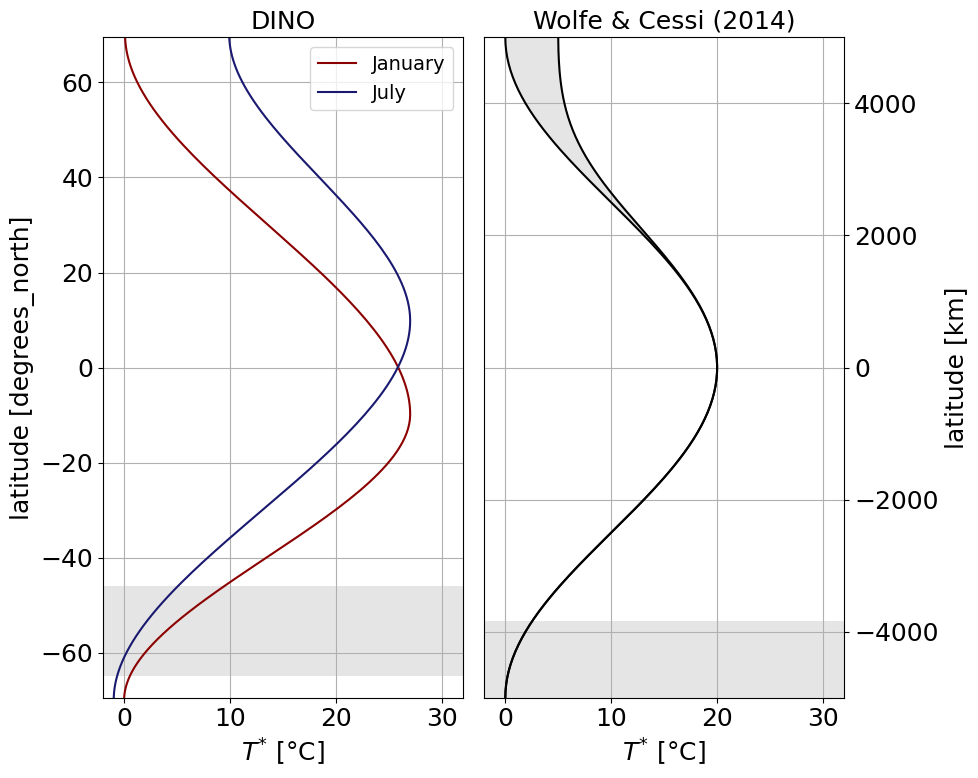

In [54]:
fig, axs = plt.subplots(1,2,figsize=(10,8), sharex=True)
dino_exp.get_T_star().isel(t_m=0, x_c=10, y_c=slice(1,-1)).plot(color='darkred', y='gphit', ax=axs[0], label='January')
dino_exp.get_T_star().isel(t_m=6, x_c=10, y_c=slice(1,-1)).plot(color='midnightblue', y='gphit', ax=axs[0], label='July')
axs[0].fill_betweenx(dino_exp.domain.gphiu.values[:,0], -2, 32, where=dino_exp.domain.umask.isel(x_f=0, z_c=0)==1, facecolor='grey', alpha=.2)
axs[0].margins(x=0, y=0)
axs[0].set_title('DINO')
axs[0].grid()
axs[0].legend()
axs[0].set_xlabel(r"$T^{*}$ [°C]")

axs[1].plot(T_star_max, lat, color='black')
axs[1].plot(T_star_min, lat, color='black')
axs[1].fill_betweenx(lat, -2, 32, where=lat<-3800, facecolor='grey', alpha=.2)
axs[1].fill_betweenx(lat, T_star_min, T_star_max, facecolor='grey', alpha=.2)
axs[1].margins(x=0, y=0)
axs[1].set_ylabel('latitude [km]')
axs[1].set_xlabel(r"$T^{*}$ [°C]")
axs[1].set_title('Wolfe & Cessi (2014)')
axs[1].grid()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
plt.tight_layout()
#plt.savefig('T_star.png', facecolor=(1,1,1,0))

In [66]:
# Wolfe Cessi (2014) analytical forcing

EmP_wc  =  1026. * 0.81 * ( np.cos(
    np.pi * lat / (5000) )
    - 2.0 * np.exp( - lat**2 / 900**2)
) / 360 / 24 / 3600.
S_star_dino = 37.12 * np.exp( - dino_exp.domain.gphit.isel(x_c=30)**2 / 260.**2 ) - 1.1 * np.exp( - dino_exp.domain.gphit.isel(x_c=30)**2 / 7.5**2 )

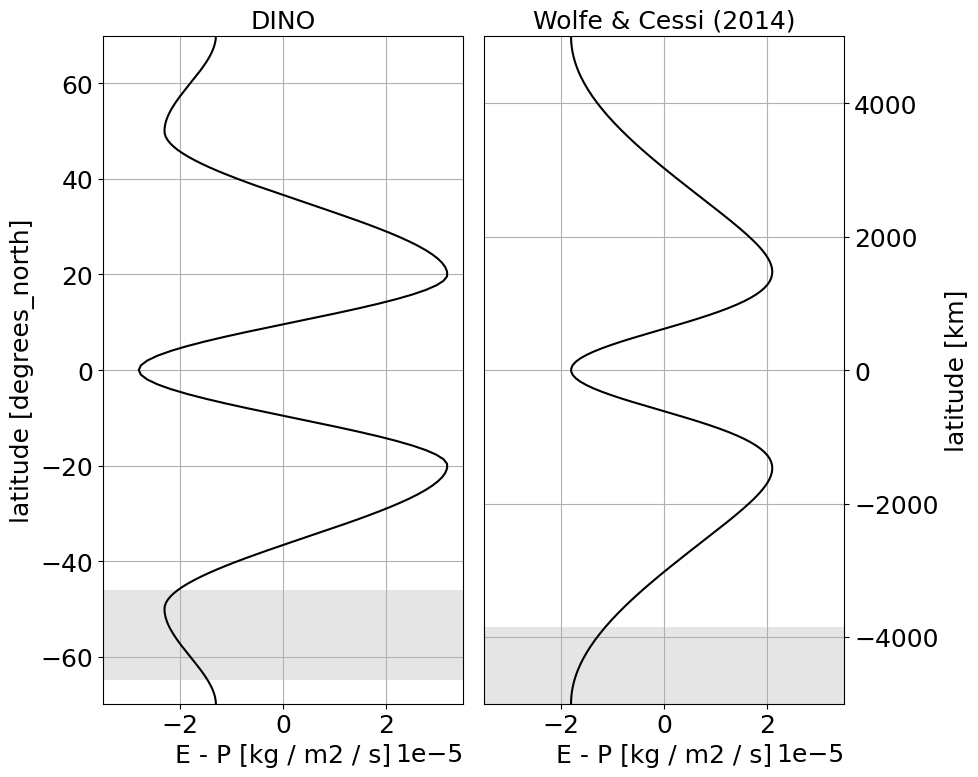

In [76]:
fig, axs = plt.subplots(1,2,figsize=(10,8), sharex=True)
dino_exp.data.empmr.isel(t_m=-1, x_c=10).plot(color='black', y='gphit', ax=axs[0])
axs[0].fill_betweenx(dino_exp.domain.gphiu.values[:,0], -3.5e-5, 3.5e-5, where=dino_exp.domain.umask.isel(x_f=0, z_c=0)==1, facecolor='grey', alpha=.2)
axs[0].margins(x=0, y=0)
axs[0].set_xlabel(r"E - P [kg / m2 / s]")
axs[0].set_title('DINO')
axs[0].grid()

axs[1].plot(EmP_wc - np.mean(EmP_wc), lat, color='black')
axs[1].fill_betweenx(lat, -3.5e-5, 3.5e-5, where=lat<-3800, facecolor='grey', alpha=.2)
axs[1].margins(x=0, y=0)
axs[1].set_ylabel('latitude [km]')
axs[1].set_xlabel(r"E - P [kg / m2 / s]")
axs[1].set_title('Wolfe & Cessi (2014)')
axs[1].grid()
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
plt.tight_layout()
plt.savefig('EmP.png', facecolor=(1,1,1,0))

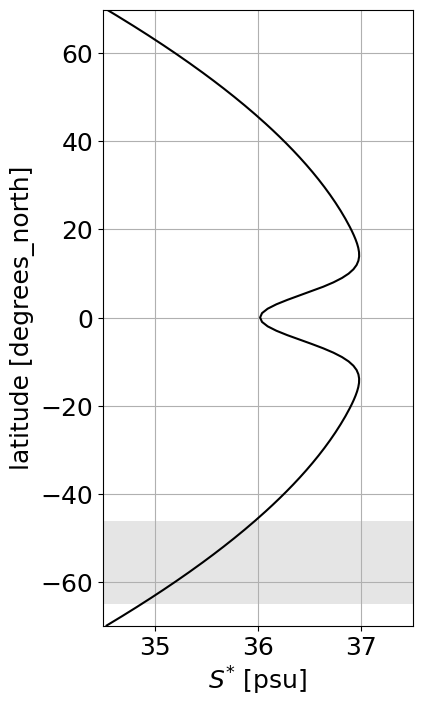

In [94]:
fig, axs = plt.subplots(1,1,figsize=(4,8))
S_star_dino.plot(color='black', y='gphit', ax=axs)
axs.fill_betweenx(dino_exp.domain.gphiu.values[:,0], 34.5, 37.5, where=dino_exp.domain.umask.isel(x_f=0, z_c=0)==1, facecolor='grey', alpha=.2)
axs.margins(x=0, y=0)
axs.set_xlabel(r"$S^{*}$ [psu]")
axs.set_title('')
axs.grid()
plt.savefig('S_star.png', facecolor=(1,1,1,0), bbox_inches='tight')

In [3]:
path   = "/data/dkamm/nemo_output/DINO/"

dino_exp_sr = Experiment(path, 'SaltRestoring')
#dino_exp_sp = Experiment(path, 'SaltPassive')

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


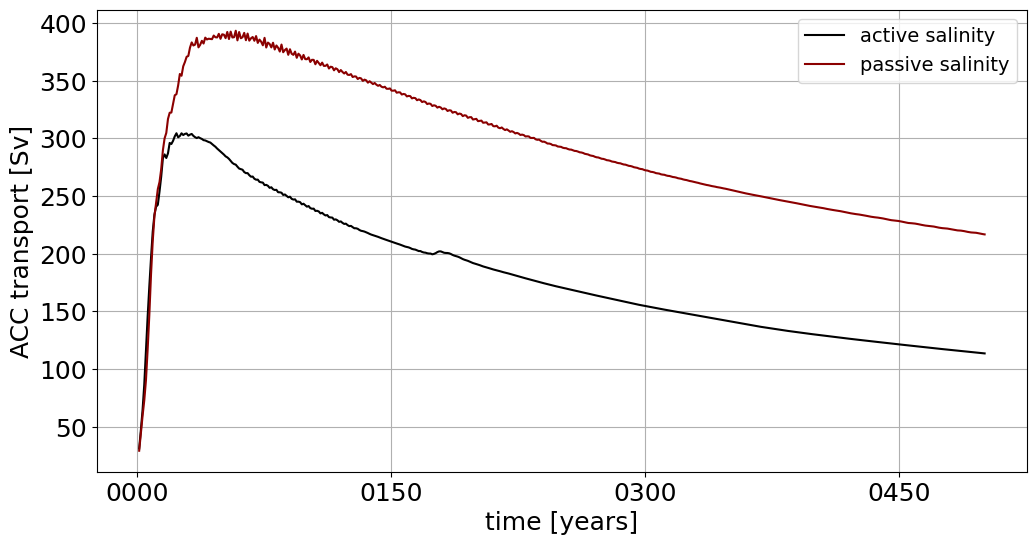

In [109]:
fig, axs = plt.subplots(1,1, figsize=(12,6))
dino_exp_sr.get_ACC().plot(color='black', label='active salinity')
dino_exp_sp.get_ACC().plot(color='darkred', label='passive salinity')
axs.set_ylabel('ACC transport [Sv]')
plt.title('')
plt.xlabel('time [years]')
plt.legend()
plt.grid()
plt.savefig('acc_sp.png', facecolor=(1,1,1,0), bbox_inches='tight')

In [101]:
moc_sp = dino_exp_sr.get_MOC(dino_exp_sr.data.voce + dino_exp_sr.data.voce_eiv, isel={'t_y':150})

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


In [102]:
moc_sr2 = dino_exp_sr.get_MOC(dino_exp_sr.data.voce + dino_exp_sr.data.voce_eiv, isel={'t_y':200})

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


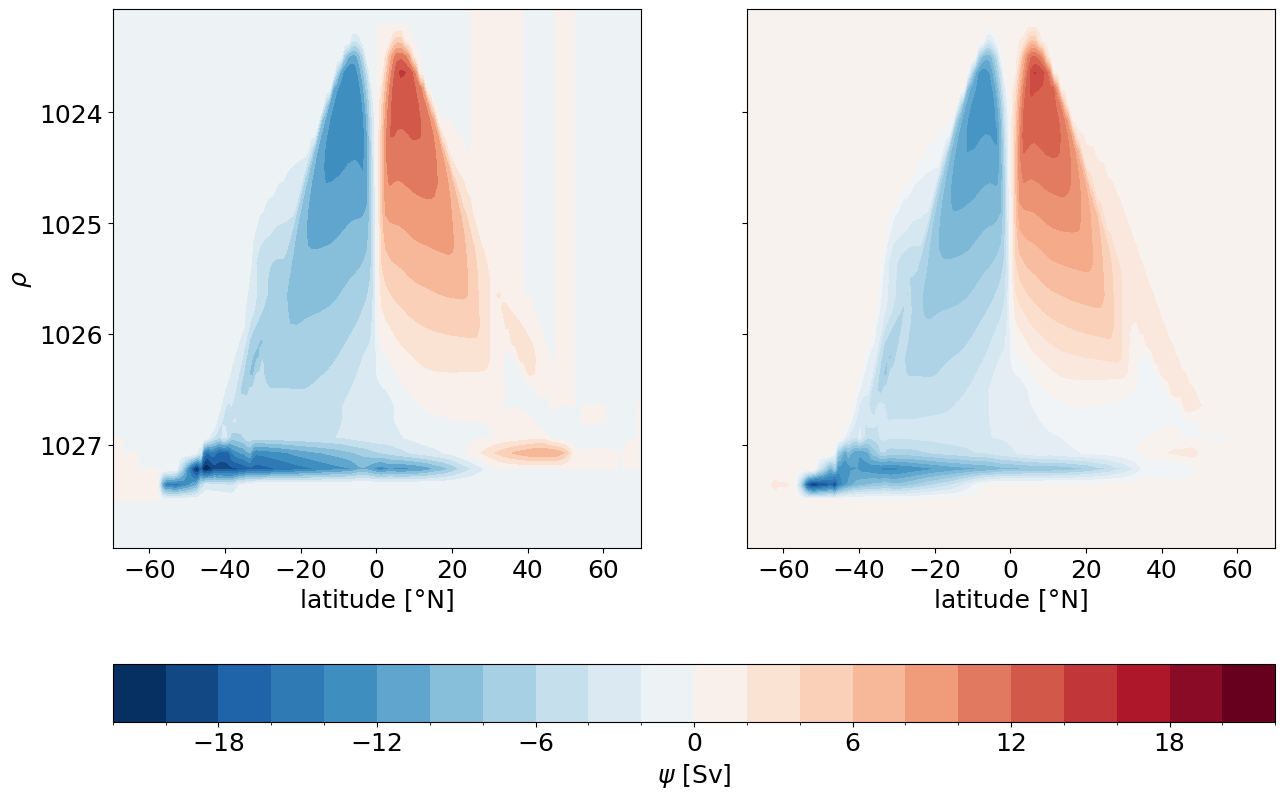

In [106]:
fig, axs = plt.subplots(1,2,figsize=(15,10), sharey=True)
a = (-moc_sr).plot.contourf(x='y_f', y='rhop', cmap='RdBu_r', levels=30, add_colorbar=False, ax=axs[0])
cbar1 = fig.colorbar(a, ax=axs[:2], location='bottom' , label=r'$\psi$ [Sv]')
b = (-moc_sr2).plot.contourf(x='y_f', y='rhop', cmap='RdBu_r', levels=30, add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, ax=axs[1])
axs[0].set_xlabel('latitude [°N]')
axs[0].invert_yaxis()
axs[1].set_xlabel('latitude [°N]')
axs[0].set_ylabel(r'$\rho$')
axs[1].set_ylabel('')
axs[0].set_title('')
axs[1].set_title('')
plt.savefig('moc_sr.png', facecolor=(1,1,1,0), bbox_inches='tight')

In [79]:
moc_sp = dino_exp_sp.get_MOC(dino_exp_sp.data.voce + dino_exp_sp.data.voce_eiv)

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


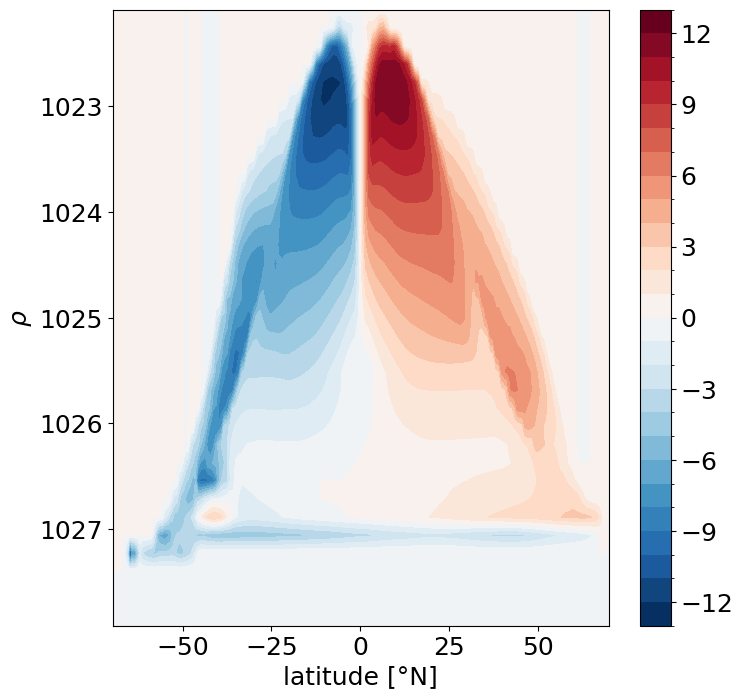

In [111]:
fig, axs = plt.subplots(1,1,figsize=(8,8))
a = (-moc_sp).plot.contourf(x='y_f', y='rhop', cmap='RdBu_r', levels=30, ax=axs)
axs.set_xlabel('latitude [°N]')
axs.invert_yaxis()
axs.set_ylabel(r'$\rho$')
axs.set_title('')
plt.savefig('moc_sp.png', facecolor=(1,1,1,0), bbox_inches='tight')

In [4]:
bts_sp = dino_exp_sp.get_BTS().isel(t_y=-1)
bts_sr = dino_exp_sr.get_BTS().isel(t_y=-1)

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


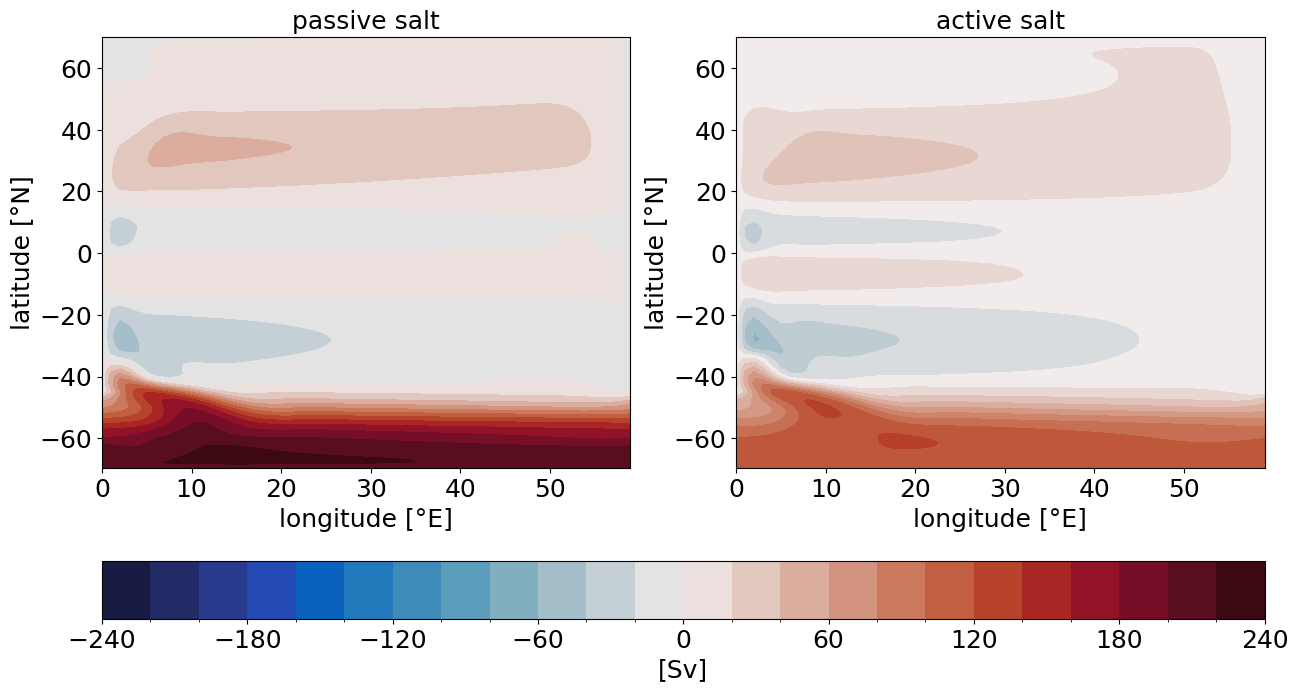

In [7]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
a = bts_sp.plot.contourf(x='glamf', y='gphif', cmap=cm.balance, levels=30, add_colorbar=False, ax=axs[0])
cbar1 = fig.colorbar(a, ax=axs[:2], location='bottom' , label='[Sv]')
b = bts_sr.plot.contourf(x='glamf', y='gphif', cmap=cm.balance, levels=30, add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, ax=axs[1])
axs[0].set_ylabel('latitude [°N]')
axs[0].set_xlabel('longitude [°E]')
axs[1].set_ylabel('latitude [°N]')
axs[1].set_xlabel('longitude [°E]')
axs[0].set_title('passive salt')
axs[1].set_title('active salt')
plt.savefig('bts.png', facecolor=(1,1,1,0), bbox_inches='tight')

In [10]:
Jul_sr = dino_exp_sr.data.mldr10_1.where(((dino_exp_sr.data['t_m.year'] >= 480) & (dino_exp_sr.data['t_m.month'] == 7) & (dino_exp_sr.data['t_m.year'] <= 500)), drop=True).mean('t_m')
Jul_sp = dino_exp_sp.data.mldr10_1.where(((dino_exp_sp.data['t_m.year'] >= 480) & (dino_exp_sp.data['t_m.month'] == 7) & (dino_exp_sp.data['t_m.year'] <= 500)), drop=True).mean('t_m')
Feb_sr = dino_exp_sr.data.mldr10_1.where(((dino_exp_sr.data['t_m.year'] >= 480) & (dino_exp_sr.data['t_m.month'] == 2) & (dino_exp_sr.data['t_m.year'] <= 500)), drop=True).mean('t_m')
Feb_sp = dino_exp_sp.data.mldr10_1.where(((dino_exp_sp.data['t_m.year'] >= 480) & (dino_exp_sp.data['t_m.month'] == 2) & (dino_exp_sp.data['t_m.year'] <= 500)), drop=True).mean('t_m')

In [13]:
Jul_sr = Jul_sr.assign_coords({'x_globe': Jul_sr.glamt - 30})
Feb_sr = Feb_sr.assign_coords({'x_globe': Feb_sr.glamt - 30})
Jul_sp = Jul_sp.assign_coords({'x_globe': Jul_sp.glamt - 30})
Feb_sp = Feb_sp.assign_coords({'x_globe': Feb_sp.glamt - 30})

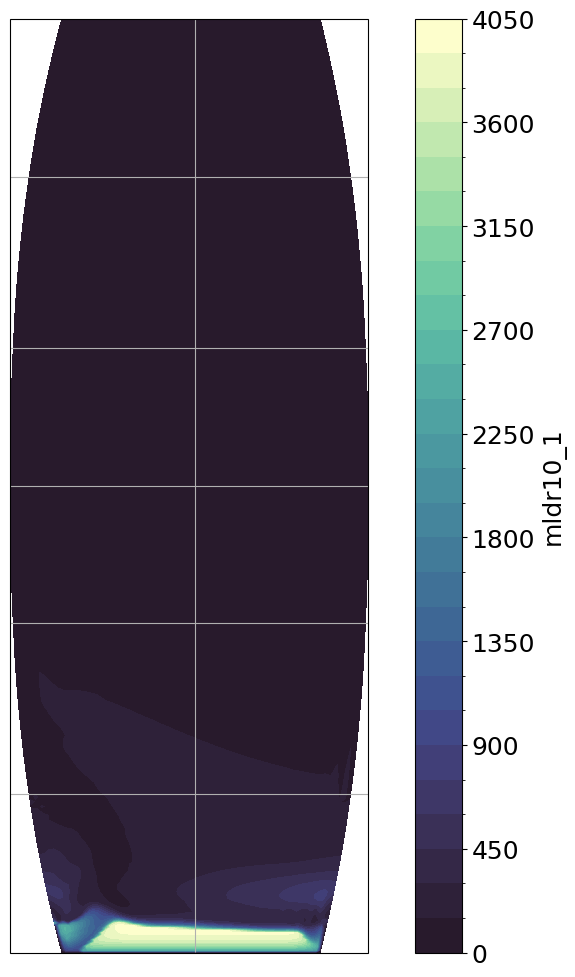

In [28]:
plt.figure(figsize=(10,10))
a = Jul_sp.plot.contourf(
    y='gphit',
    x='x_globe',
    cmap=cm.deep_r,
    levels=30,
    subplot_kws=dict(projection=ccrs.Robinson()),

    transform=ccrs.PlateCarree(),
    #add_colorbar=False,
)
a.axes.gridlines(
    draw_labels=["x", "y", "geo"],
    ylocs=[-70, -45, -20, 0, 20, 45, 70],
    xlocs=[0]
)
plt.title('')
plt.grid('m')
plt.tight_layout()
plt.savefig('mld1.png', facecolor=(1,1,1,0), bbox_inches='tight')

In [24]:
moc_sp = dino_exp_sp.get_MOC(dino_exp_sp.data.voce + dino_exp_sp.data.voce_eiv)
moc_sr = dino_exp_sr.get_MOC(dino_exp_sr.data.voce + dino_exp_sr.data.voce_eiv)

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_

Text(0.5, 1.0, '')

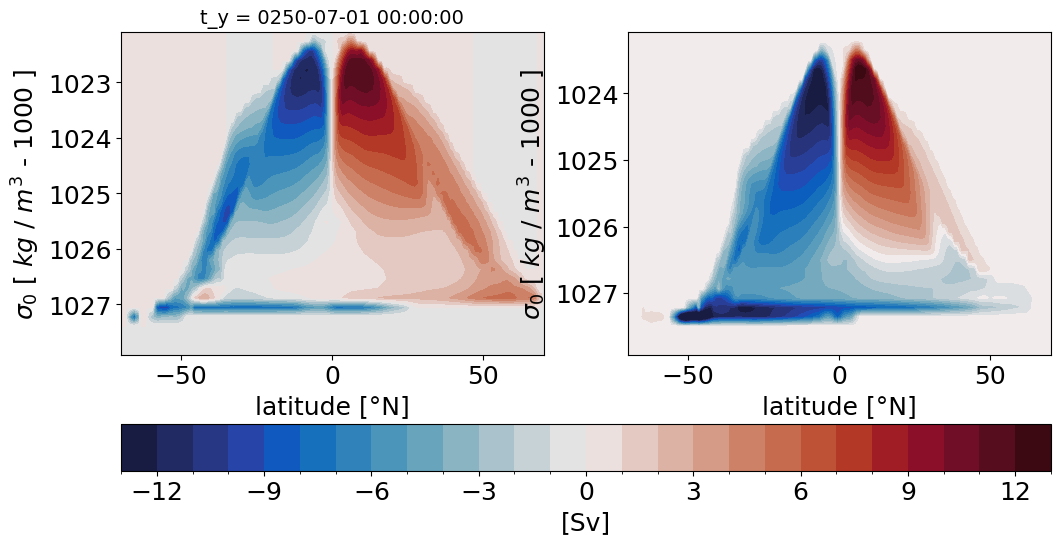

In [25]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
a = (- moc_sp).plot.contourf(x='y_f', y='rhop', cmap=cm.balance, levels=30, add_colorbar=False, ax=axs[0])
cbar1 = fig.colorbar(a, ax=axs[:2], location='bottom' , label='[Sv]')
b = (- moc_sr).plot.contourf(x='y_f', y='rhop', cmap=cm.balance, levels=30, add_colorbar=False, vmin=cbar1.vmin, vmax=cbar1.vmax, ax=axs[1])
axs[0].set_xlabel('latitude [°N]')
axs[0].invert_yaxis()
axs[0].set_ylabel(r'$\sigma_{0}$ [ $kg$ / $m^3$ - 1000 ]')
axs[1].set_xlabel('latitude [°N]')
axs[1].invert_yaxis()
axs[1].set_ylabel(r'$\sigma_{0}$ [ $kg$ / $m^3$ - 1000 ]')
plt.title('')

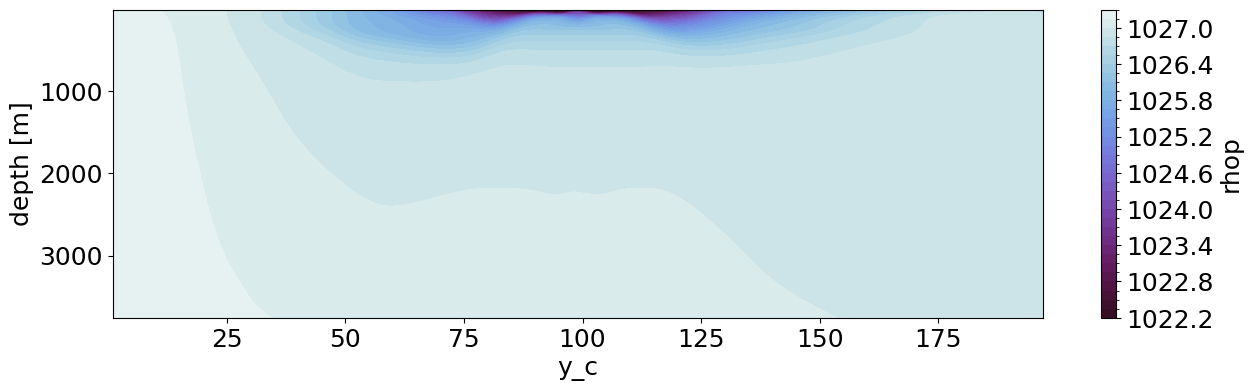

In [49]:
plt.figure(figsize=(15,4))
dino_exp_sp.data.rhop.isel(x_c=slice(15, -15), t_y=slice(-10,-1), y_c=slice(1,-1), z_c=slice(0,-1)).mean('x_c').mean('t_y').plot.contourf(y='gdept_1d', yincrease=False, levels=36, cmap=cm.dense_r)
plt.savefig('strat_sp.png', facecolor=(1,1,1,0), bbox_inches='tight')

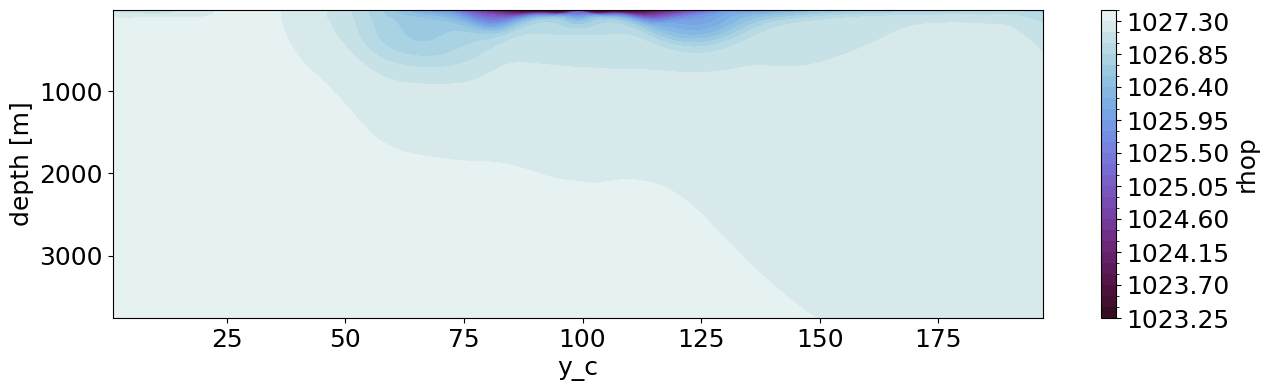

In [50]:
plt.figure(figsize=(15,4))
dino_exp_sr.data.rhop.isel(x_c=slice(15, -15), t_y=slice(-10,-1), y_c=slice(1,-1), z_c=slice(0,-1)).mean('x_c').mean('t_y').plot.contourf(y='gdept_1d', yincrease=False, levels=36, cmap=cm.dense_r)
plt.savefig('strat_sr.png', facecolor=(1,1,1,0), bbox_inches='tight')

In [4]:
T_star = dino_exp_sr.get_T_star()

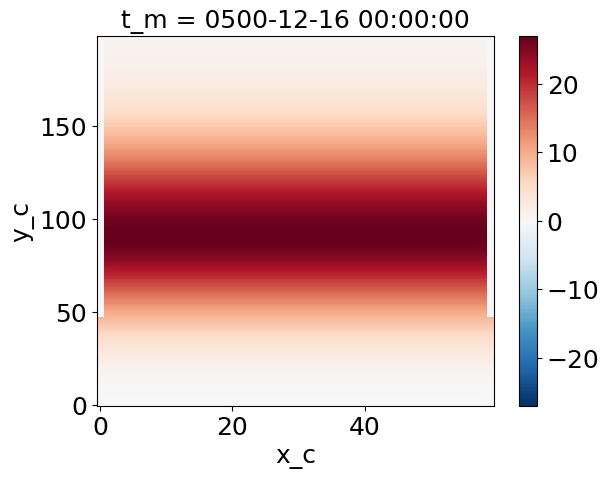

In [5]:
T_star.isel(t_m=-1).plot()

In [4]:
S_star = dino_exp_sr.get_S_star()

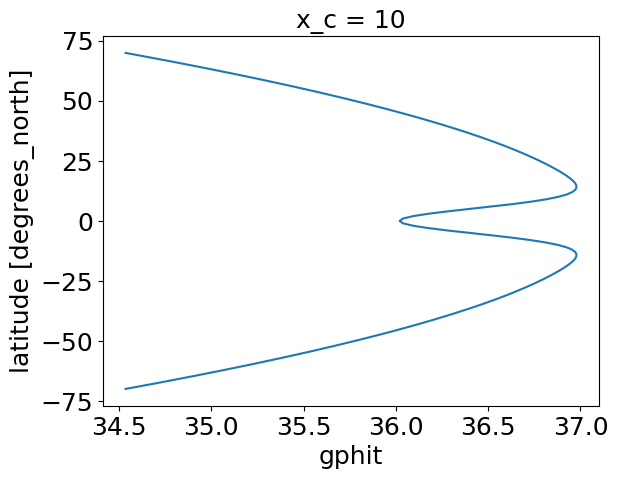

In [5]:
S_star.isel(x_c=10).plot(y='gphit')

In [6]:
rho_star = dino_exp_sr.get_rho_star()

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/dask/array/core.py:4832: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


In [19]:
rho_star = rho_star.isel(t_m=slice(-13,-1), z_c=0, x_c=10)

In [61]:
idx_n = abs(rho_star.gphit - (-40)).argmin()
idx_s = abs(rho_star.gphit - (-65)).argmin()

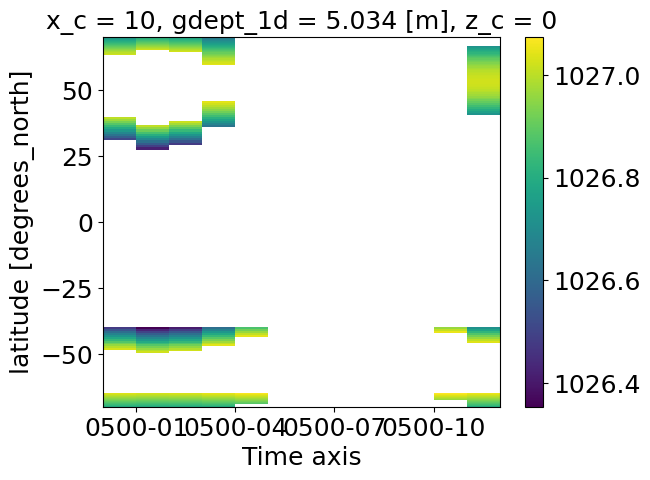

In [75]:
rho_star.where( (rho_star >= rho_star.isel(y_c=idx_n)) & (rho_star <= rho_star.isel(y_c=idx_s)) ).plot(x='t_m',y='gphit')

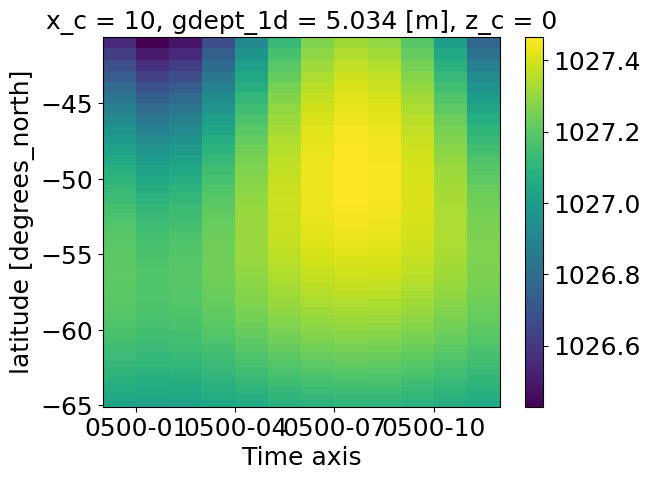

In [83]:
rho_star.isel(y_c=slice(idx_s.values,idx_n.values)).plot(x='t_m',y='gphit')

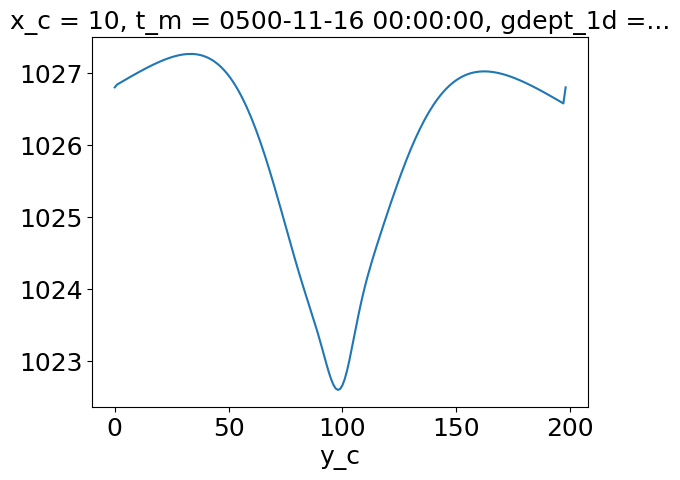

In [86]:
rho_star.isel(t_m=-1).plot()

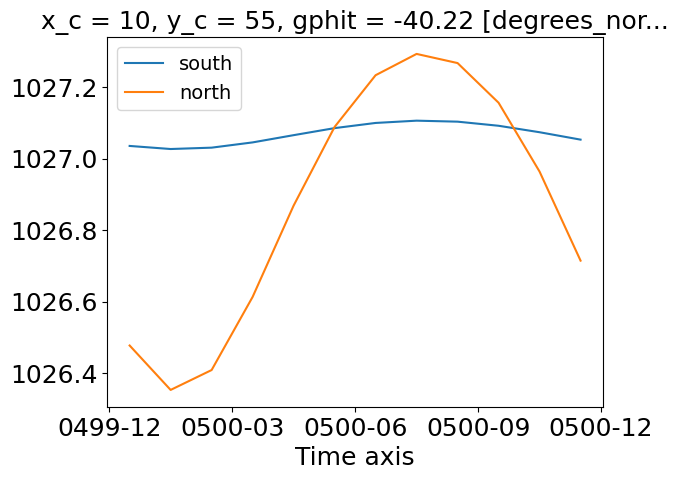

In [80]:
rho_star.isel(y_c=idx_s).plot(label='south')
rho_star.isel(y_c=idx_n).plot(label='north')
plt.legend()